<a href="https://colab.research.google.com/github/KshitijMayank/UnsupervisedLearning_Image/blob/master/USML_PCA_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization using PCA and t-SNE

### Importing the required libraries 

In [0]:
# For plots and figures
from matplotlib import image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# for matrix manipulations
import numpy as np
import pandas as pd 

# For scaling
from sklearn.preprocessing import MinMaxScaler

# for t-SNE
from sklearn.manifold import TSNE

# for pca
from sklearn.decomposition import PCA

In [0]:
images =[]
images.append(image.imread('3096_colorPlane.jpg'))
images.append(image.imread('42049_colorBird.jpg'))

# Check the dimensions of the image
print('Image Plane: {} and Image Bird: {} '.format(images[0].shape,images[1].shape))


Image Plane: (321, 481, 3) and Image Bird: (321, 481, 3) 


## Creating a feture matrix 

- By verticaly arranging the data as a DataFrame
- Adding the vertical and horizontal values over the data frame


In [0]:
data_plane = images[0]
size_plane=(data_plane.shape[0],data_plane.shape[1])
array_transformed_plane = np.moveaxis(np.indices(size_plane),0,2)
array_final_transformed_plane = np.dstack((array_transformed_plane, data_plane)).reshape((-1,5))

data_bird = images[1]
size_bird=(data_bird.shape[0],data_bird.shape[1])
array_transformed = np.moveaxis(np.indices(size_bird),0,2)
array_final_transformed_bird = np.dstack((array_transformed, data_bird)).reshape((-1,5))

In [0]:
image_matrix_plane = pd.DataFrame(array_final_transformed_plane, columns=["v","h","r_val","g_val","b_val"])
print('Plane Matrix: \n',image_matrix.head(),'\n \n \n ...',image_matrix_plane.tail())

image_matrix_bird = pd.DataFrame(array_final_transformed_bird, columns=["v","h","r_val","g_val","b_val"])
print('\n Bird Matrix: \n',image_matrix.head(),'\n \n \n ...',image_matrix_bird.tail())

Plane Matrix: 
    v  h  r_val  g_val  b_val
0  0  0    138    138    148
1  0  1    138    138    148
2  0  2    138    138    148
3  0  3    137    137    147
4  0  4    137    137    147 
 
 
 ...           v    h  r_val  g_val  b_val
154396  320  476     85     98    115
154397  320  477     86     99    116
154398  320  478     84     97    114
154399  320  479     80     93    110
154400  320  480     54     64     74

 Bird Matrix: 
    v  h  r_val  g_val  b_val
0  0  0    138    138    148
1  0  1    138    138    148
2  0  2    138    138    148
3  0  3    137    137    147
4  0  4    137    137    147 
 
 
 ...           v    h  r_val  g_val  b_val
154396  320  476     44     54     55
154397  320  477     45     50     54
154398  320  478     27     27     35
154399  320  479     29     27     38
154400  320  480     88    102    128


## Normalization of the Data

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler_plane = MinMaxScaler()
scaler_bird = MinMaxScaler()
# For plane
scaler_plane.fit(image_matrix_plane)
normalized_matrix_plane = scaler.transform(image_matrix_plane)

# For Bird
scaler_bird.fit(image_matrix_plane)
normalized_matrix_bird = scaler.transform(image_matrix_bird)

In [0]:
colName= ['v','h','R_val','G_val','B_val']
# For plane
normalized_matrix_plane = pd.DataFrame(normalized_matrix_plane)
# For bird
normalized_matrix_bird = pd.DataFrame(normalized_matrix_bird)
normalized_matrix_plane.columns = colName
normalized_matrix_bird.columns = colName
print('plane data normalised: \n',normalized_matrix_plane.head())
print('\n bird data normalised: \n',normalized_matrix_bird.head())



plane data normalised: 
      v         h     R_val     G_val     B_val
0  0.0  0.000000  0.750000  0.754098  0.826816
1  0.0  0.002083  0.750000  0.754098  0.826816
2  0.0  0.004167  0.750000  0.754098  0.826816
3  0.0  0.006250  0.744565  0.748634  0.821229
4  0.0  0.008333  0.744565  0.748634  0.821229

 bird data normalised: 
      v         h     R_val     G_val     B_val
0  0.0  0.000000  0.320652  0.475410  0.620112
1  0.0  0.002083  0.326087  0.480874  0.625698
2  0.0  0.004167  0.331522  0.486339  0.631285
3  0.0  0.006250  0.342391  0.497268  0.642458
4  0.0  0.008333  0.353261  0.508197  0.653631


## Applying PCA 

In [0]:
#Fitting the PCA algorithm with our Data
pca = PCA()
pca_fit_plane = pca.fit(normalized_matrix_plane)
pca_fit_bird = pca.fit(normalized_matrix_bird)

### Plotting the variance explained to choose the ideal number of components

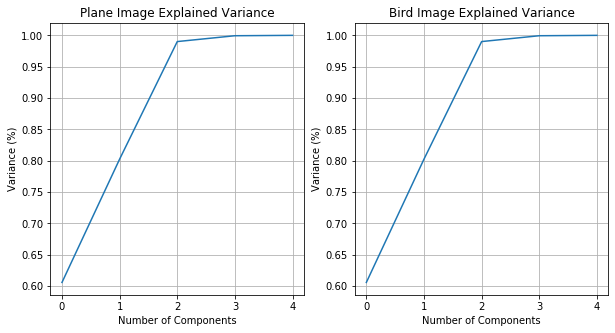

In [0]:
#Plotting the Cumulative Summation of the Explained Variance
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.plot(np.cumsum(pca_fit_plane.explained_variance_ratio_))
ax2.plot(np.cumsum(pca_fit_bird.explained_variance_ratio_))
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Variance (%)') #for each component
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Variance (%)') #for each component
ax1.title.set_text('Plane Image Explained Variance')
ax2.title.set_text('Bird Image Explained Variance')
ax1.grid()
ax2.grid()
plt.show()

### Observation
*By looking at the above graphs we see a knee point at **n=2** and its also evident that it explains more than 95% of variance close to ~98% to be very exact

### Now, plotting the scatter plot along the two components to better describe the data and capture variance

In [0]:
pca = PCA(n_components= 2)
pca_fit_plane = pca.fit_transform(normalized_matrix_plane)
pca_fit_bird = pca.fit_transform(normalized_matrix_bird)

In [0]:
# Creating Data Frames
pca_fit_plane_2c = pd.DataFrame(data= {'pc1': pca_fit_plane[:,0],'pc2': pca_fit_plane[:,1]})
pca_fit_bird_2c = pd.DataFrame(data= {'pc1': pca_fit_bird[:,0],'pc2': pca_fit_bird[:,1]})

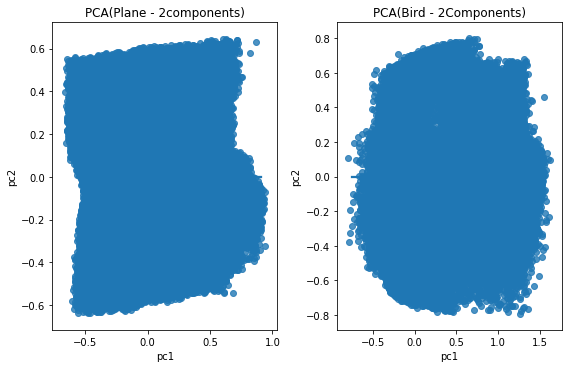

In [0]:
# Plotting the fitted model
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
sns.regplot(x="pc1", y="pc2",data=pca_fit_plane_2c,x_jitter=0.1,y_jitter=0.1,ax=ax1)
sns.regplot(x="pc1", y="pc2",data=pca_fit_bird_2c,x_jitter=0.1,y_jitter=0.1,ax=ax2)
fig.tight_layout()
ax1.title.set_text('PCA(Plane - 2components)')
ax2.title.set_text('PCA(Bird - 2Components)')

### Reconstruction of Images
***Using the 2 obtained principal components***

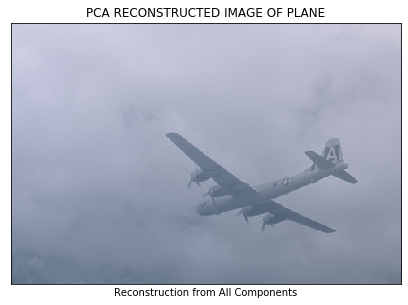

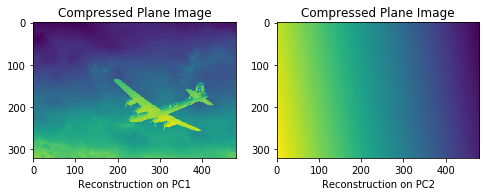

In [0]:
pca1 = PCA(n_components=2)
pca_fit = pca1.fit(normalized_matrix_plane)
pca_img_compressed = pca_fit.transform(normalized_matrix_plane)
img_decompressed = pca_fit.inverse_transform(pca_img_compressed)


fig, ax = plt.subplots(1,1, figsize=(7, 7),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
ax.imshow(img_decompressed[:,2:5].reshape(321,481,3))
ax.set_xlabel('Reconstruction from All Components')
# ax.set_xlabel('Reconstruction')
ax.title.set_text('PCA RECONSTRUCTED IMAGE OF PLANE')
plt.show()
fig,ax1= plt.subplots(1,2,figsize = (8,8))
for i in range(1,3):
    ax1[i-1].imshow(pca_img_compressed[:,i-1].reshape(321,481))
    ax1[i-1].set_xlabel('Reconstruction on PC{}'.format(i))
    ax1[i-1].title.set_text('Compressed Plane Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


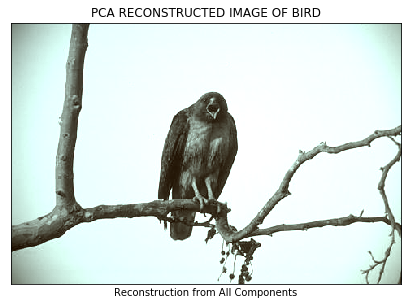

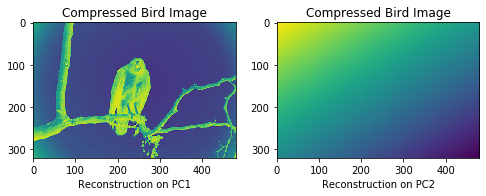

In [0]:
pca1 = PCA(n_components=2)
pca_fit = pca1.fit(normalized_matrix_bird)
pca_img_compressed = pca_fit.transform(normalized_matrix_bird)
img_decompressed = pca_fit.inverse_transform(pca_img_compressed)



fig, ax = plt.subplots(1,1, figsize=(7, 7),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
ax.imshow(img_decompressed[:,2:5].reshape(321,481,3))
ax.set_xlabel('Reconstruction from All Components')
# ax.set_xlabel('Reconstruction')
ax.title.set_text('PCA RECONSTRUCTED IMAGE OF BIRD')
plt.show()
fig,ax1= plt.subplots(1,2,figsize = (8,8))
for i in range(1,3):
    ax1[i-1].imshow(pca_img_compressed[:,i-1].reshape(321,481))
    ax1[i-1].set_xlabel('Reconstruction on PC{}'.format(i))
    ax1[i-1].title.set_text('Compressed Bird Image')

# Applying t-SNE  

### `Attempt1:For the first attempt we take perplexity as 40 and take the entire data set with 300 iterations`

In [0]:

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)


In [0]:
# fitting the plane data 
tsne_plane_2d = tsne.fit_transform(normalized_matrix_plane)
tsne_bird_2d = tsne.fit_transform(normalized_matrix_bird)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 154401 samples in 0.137s...
[t-SNE] Computed neighbors for 154401 samples in 4.753s...
[t-SNE] Computed conditional probabilities for sample 1000 / 154401
[t-SNE] Computed conditional probabilities for sample 2000 / 154401
[t-SNE] Computed conditional probabilities for sample 3000 / 154401
[t-SNE] Computed conditional probabilities for sample 4000 / 154401
[t-SNE] Computed conditional probabilities for sample 5000 / 154401
[t-SNE] Computed conditional probabilities for sample 6000 / 154401
[t-SNE] Computed conditional probabilities for sample 7000 / 154401
[t-SNE] Computed conditional probabilities for sample 8000 / 154401
[t-SNE] Computed conditional probabilities for sample 9000 / 154401
[t-SNE] Computed conditional probabilities for sample 10000 / 154401
[t-SNE] Computed conditional probabilities for sample 11000 / 154401
[t-SNE] Computed conditional probabilities for sample 12000 / 154401
[t-SNE] Computed conditional probab

[t-SNE] Computed conditional probabilities for sample 122000 / 154401
[t-SNE] Computed conditional probabilities for sample 123000 / 154401
[t-SNE] Computed conditional probabilities for sample 124000 / 154401
[t-SNE] Computed conditional probabilities for sample 125000 / 154401
[t-SNE] Computed conditional probabilities for sample 126000 / 154401
[t-SNE] Computed conditional probabilities for sample 127000 / 154401
[t-SNE] Computed conditional probabilities for sample 128000 / 154401
[t-SNE] Computed conditional probabilities for sample 129000 / 154401
[t-SNE] Computed conditional probabilities for sample 130000 / 154401
[t-SNE] Computed conditional probabilities for sample 131000 / 154401
[t-SNE] Computed conditional probabilities for sample 132000 / 154401
[t-SNE] Computed conditional probabilities for sample 133000 / 154401
[t-SNE] Computed conditional probabilities for sample 134000 / 154401
[t-SNE] Computed conditional probabilities for sample 135000 / 154401
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 85000 / 154401
[t-SNE] Computed conditional probabilities for sample 86000 / 154401
[t-SNE] Computed conditional probabilities for sample 87000 / 154401
[t-SNE] Computed conditional probabilities for sample 88000 / 154401
[t-SNE] Computed conditional probabilities for sample 89000 / 154401
[t-SNE] Computed conditional probabilities for sample 90000 / 154401
[t-SNE] Computed conditional probabilities for sample 91000 / 154401
[t-SNE] Computed conditional probabilities for sample 92000 / 154401
[t-SNE] Computed conditional probabilities for sample 93000 / 154401
[t-SNE] Computed conditional probabilities for sample 94000 / 154401
[t-SNE] Computed conditional probabilities for sample 95000 / 154401
[t-SNE] Computed conditional probabilities for sample 96000 / 154401
[t-SNE] Computed conditional probabilities for sample 97000 / 154401
[t-SNE] Computed conditional probabilities for sample 98000 / 154401
[t-SNE] Computed conditional proba

In [0]:
#For the plane figure
tsne_matrix_plane_2d= pd.DataFrame(data={'pc1':tsne_plane_2d[:,0],'pc2':tsne_plane_2d[:,1]})


# For the bird figure
tsne_matrix_bird_2d = pd.DataFrame(data={'pc1':tsne_plane_2d[:,0],'pc2':tsne_plane_2d[:,1]})


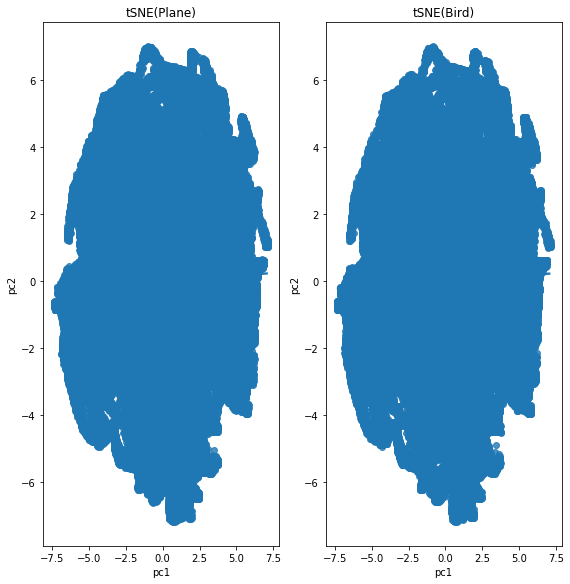

In [0]:
#For the plane figure
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_plane_2d,x_jitter=0.1,y_jitter=0.1,ax=ax1)
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_bird_2d,x_jitter=0.1,y_jitter=0.1,ax=ax2)
fig.tight_layout()
ax1.title.set_text('tSNE(Plane)')
ax2.title.set_text('tSNE(Bird)')

#### Observation


### `Attempt2: Now, for the second attempt we take a sample of 7000 data points to better understand the variance and avoid over plotting. Here, we take perplexity as 30 `

In [0]:
normalized_sample_plane = normalized_matrix_plane.sample(7000)
normalized_sample_bird = normalized_matrix_bird.sample(7000)

In [0]:
# fitting the model
tsne_rsample = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)


# fitting the plane data 
tsne_plane_2d_rsample = tsne_rsample.fit_transform(normalized_sample_plane)
tsne_bird_2d_rsample = tsne_rsample.fit_transform(normalized_sample_bird)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.004s...
[t-SNE] Computed neighbors for 7000 samples in 0.176s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 0.032141
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.719360
[t-SNE] KL divergence after 300 iterations: 1.858950
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.003s...
[t-SNE] Computed neighbors for 7000 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional p

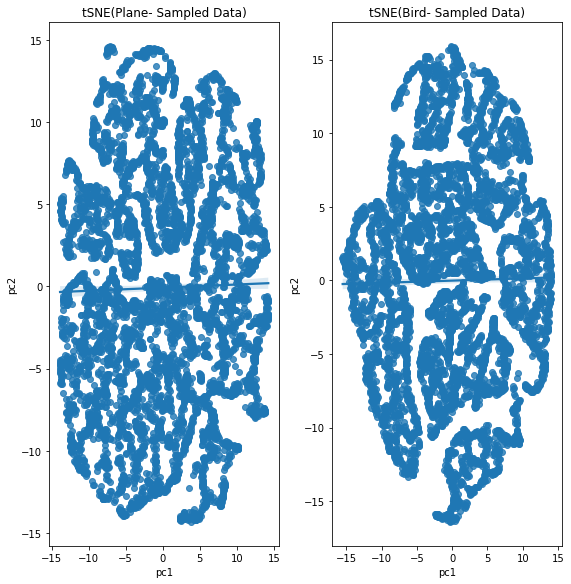

In [0]:
#For the plane figure
tsne_matrix_plane_2d_rs= pd.DataFrame(data={'pc1':tsne_plane_2d_rsample[:,0],'pc2':tsne_plane_2d_rsample[:,1]})


# For the bird figure
tsne_matrix_bird_2d_rs = pd.DataFrame(data={'pc1':tsne_bird_2d_rsample[:,0],'pc2':tsne_bird_2d_rsample[:,1]})


#For the plane figure
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_plane_2d_rs,x_jitter=0.1,y_jitter=0.1,ax=ax1)
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_bird_2d_rs,x_jitter=0.1,y_jitter=0.1,ax=ax2)
fig.tight_layout()
ax1.title.set_text('tSNE(Plane- Sampled Data)')
ax2.title.set_text('tSNE(Bird- Sampled Data)')

### Again working on the sample data (7000)
#### `Attempt3: Now, we take perplexity as 45 `

In [0]:
normalized_sample_plane = normalized_matrix_plane.sample(7000)
normalized_sample_bird = normalized_matrix_bird.sample(7000)

In [0]:
# fitting the model
tsne_rsample = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=300)


# fitting the plane data 
tsne_plane_2d_rsample = tsne_rsample.fit_transform(normalized_sample_plane)
tsne_bird_2d_rsample = tsne_rsample.fit_transform(normalized_sample_bird)

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.004s...
[t-SNE] Computed neighbors for 7000 samples in 0.273s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 0.038775
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.581421
[t-SNE] KL divergence after 300 iterations: 1.548980
[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.003s...
[t-SNE] Computed neighbors for 7000 samples in 0.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional

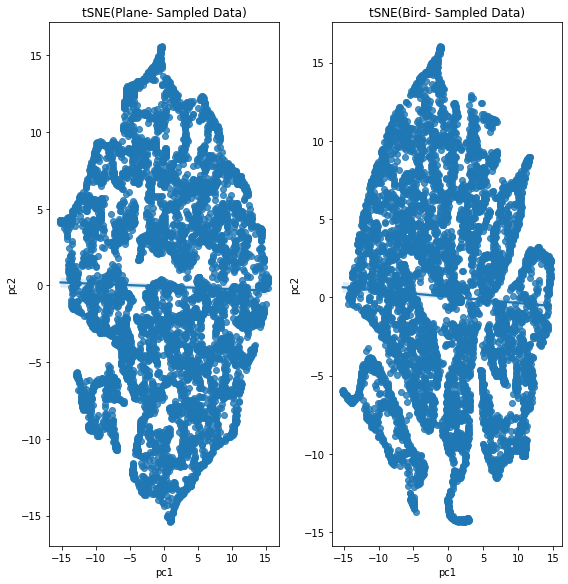

In [0]:
#For the plane figure
tsne_matrix_plane_2d_rs= pd.DataFrame(data={'pc1':tsne_plane_2d_rsample[:,0],'pc2':tsne_plane_2d_rsample[:,1]})


# For the bird figure
tsne_matrix_bird_2d_rs = pd.DataFrame(data={'pc1':tsne_bird_2d_rsample[:,0],'pc2':tsne_bird_2d_rsample[:,1]})


#For the plane figure
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_plane_2d_rs,x_jitter=0.1,y_jitter=0.1,ax=ax1)
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_bird_2d_rs,x_jitter=0.1,y_jitter=0.1,ax=ax2)
fig.tight_layout()
ax1.title.set_text('tSNE(Plane- Sampled Data)')
ax2.title.set_text('tSNE(Bird- Sampled Data)')

### Taking random sample of the data only now with 500 data points
### `Attempt4: Now, we take perplexity as 35`

In [0]:
normalized_sample_plane = normalized_matrix_plane.sample(5000)
normalized_sample_bird = normalized_matrix_bird.sample(5000)

In [0]:
# fitting the model
tsne_rsample = TSNE(n_components=2, verbose=1, perplexity=35, n_iter=300)


# fitting the plane data 
tsne_plane_2d_rsample = tsne_rsample.fit_transform(normalized_sample_plane)
tsne_bird_2d_rsample = tsne_rsample.fit_transform(normalized_sample_bird)

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.003s...
[t-SNE] Computed neighbors for 5000 samples in 0.136s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.040792
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.822411
[t-SNE] KL divergence after 300 iterations: 1.385106
[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...
[t-SNE] Computed neighbors for 5000 samples in 0.126s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional

In [0]:
#### For the plane figure
tsne_matrix_plane_2d_rs= pd.DataFrame(data={'pc1':tsne_plane_2d_rsample[:,0],'pc2':tsne_plane_2d_rsample[:,1]})


# For the bird figure
tsne_matrix_bird_2d_rs = pd.DataFrame(data={'pc1':tsne_bird_2d_rsample[:,0],'pc2':tsne_bird_2d_rsample[:,1]})


#For the plane figure
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_plane_2d_rs,x_jitter=0.1,y_jitter=0.1,ax=ax1)
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_bird_2d_rs,x_jitter=0.1,y_jitter=0.1,ax=ax2)
fig.tight_layout()
ax1.title.set_text('tSNE(Plane- Sampled Data)')
ax2.title.set_text('tSNE(Bird- Sampled Data)')

### Trying 3D Visualization of the data points to see if it improves our inferences
### `Attempt5:perplexity = 35 , no of components as 3 and Data Points as 5000`

In [0]:
tsne_matrix_plane_sample = normalized_matrix_plane.sample(5000)
tsne_matrix_bird_sample = normalized_matrix_bird.sample(5000)
tsne = TSNE(n_components=3, perplexity=35, n_iter=300)

In [0]:
# fitting the plane data 
tsne_plane = tsne.fit_transform(tsne_matrix_plane_sample)
tsne_bird = tsne.fit_transform(tsne_matrix_bird_sample)

In [0]:
tsne_matrix_plane_3d = pd.DataFrame(tsne_plane)
tsne_matrix_bird_3d = pd.DataFrame(tsne_bird)
tsne_matrix_plane_3d.columns= ['pc1','pc2','pc3']
tsne_matrix_bird_3d.columns= ['pc1','pc2','pc3']
print('Plane:\n',tsne_matrix_plane_3d.head())
print('\nBird:\n',tsne_matrix_bird_3d.head())

Plane:
         pc1       pc2       pc3
0 -1.679132  3.238017  7.730952
1  0.817171  4.443433 -3.490259
2 -3.381313 -2.636520 -5.419476
3 -8.582192  2.494362  0.766804
4 -4.782639 -5.260371  5.737857

Bird:
         pc1       pc2       pc3
0  9.871472  0.863841  2.141031
1  5.610064 -1.938208  2.524635
2  5.645836  3.989864 -2.338899
3  2.731699  1.926500  0.128306
4 -8.413000 -1.270143 -0.150947


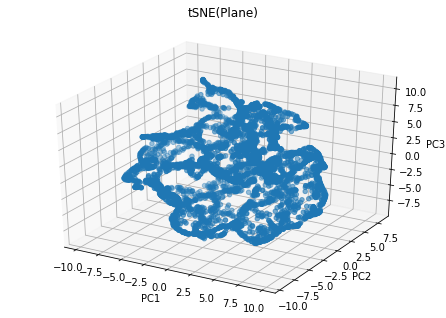

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax1 = Axes3D(fig)

ax1.scatter(tsne_matrix_plane_3d['pc1'], tsne_matrix_plane_3d['pc2'], tsne_matrix_plane_3d['pc3'])
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.title.set_text('tSNE(Plane)')
plt.show()



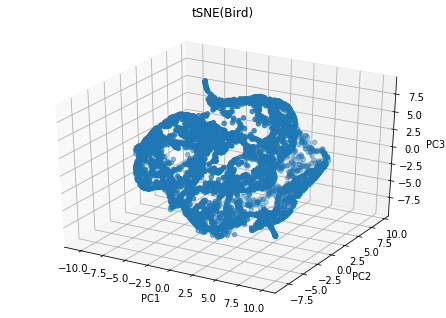

In [0]:
fig = plt.figure()
ax2 = Axes3D(fig)

ax2.scatter(tsne_matrix_bird_3d['pc1'], tsne_matrix_bird_3d['pc2'], tsne_matrix_bird_3d['pc3'])
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.title.set_text('tSNE(Bird)')
plt.show()